In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

plt.style.use('seaborn')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Vehicle%20dataset/car%20data.csv")
df.rename(columns = {"Owner": "Past_Owners"},inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Past_Owners    301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Past_Owners      False
dtype: bool

In [5]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


array([[<AxesSubplot:title={'center':'Kms_Driven'}>,
        <AxesSubplot:title={'center':'Present_Price'}>],
       [<AxesSubplot:title={'center':'Selling_Price'}>,
        <AxesSubplot:title={'center':'Year'}>]], dtype=object)

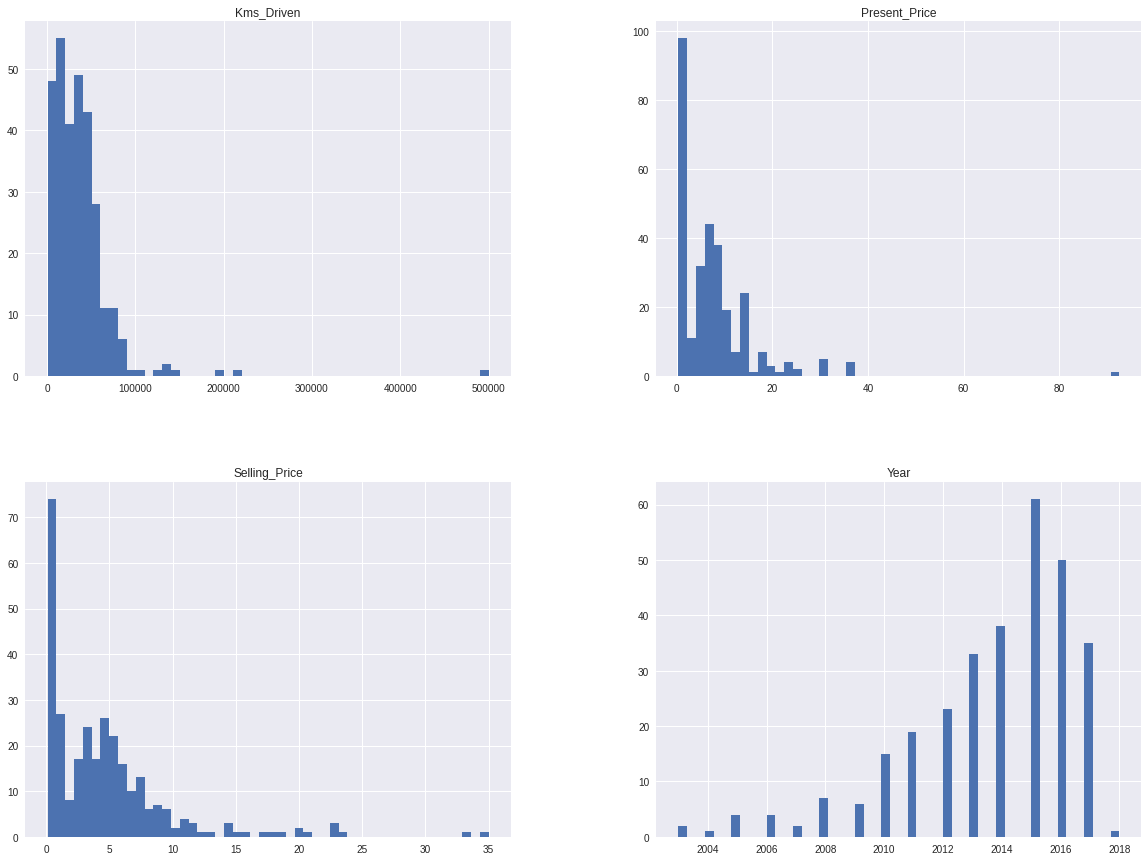

In [6]:
atttibutes_hist = df[["Kms_Driven", "Present_Price", "Selling_Price", "Year"]].hist(bins=50, figsize=(20,15))
atttibutes_hist

Text(0.5, 1.0, 'number of Past Owners:')

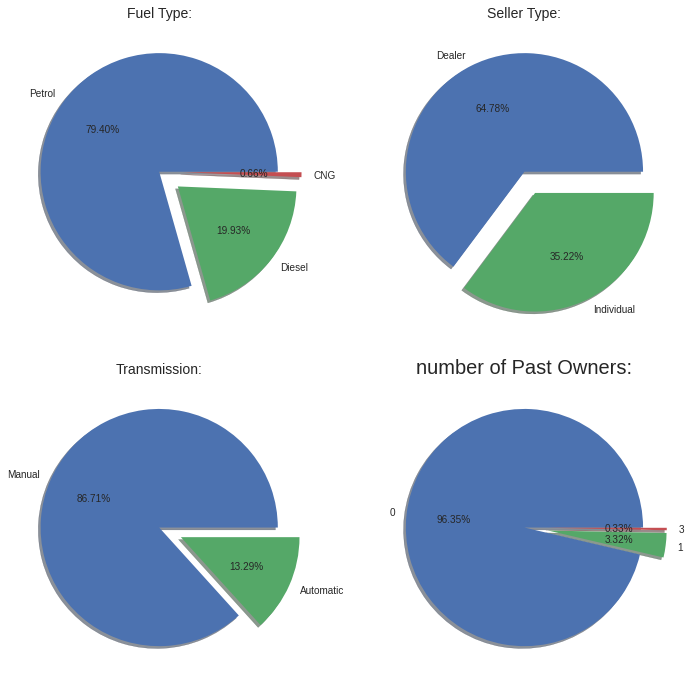

In [7]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = df['Fuel_Type'].value_counts().index.tolist()
values = df['Fuel_Type'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2, 0.2])
ax1.set_title("Fuel Type:", fontdict={'fontsize': 14})

labels = df['Seller_Type'].value_counts().index.tolist()[:2]
values = df['Seller_Type'].value_counts().tolist()[:2]
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax2.set_title("Seller Type:", fontdict={'fontsize': 14})

labels = df['Transmission'].value_counts().index.tolist()[:2]
values = df['Transmission'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax3.set_title("Transmission:", fontdict={'fontsize': 14})

labels = df['Past_Owners'].value_counts().index.tolist()
values = df['Past_Owners'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2, 0.2])
ax4.set_title("number of Past Owners:", fontdict={'fontsize': 20})

In [8]:
print(df["Fuel_Type"].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [9]:
df = df[df['Fuel_Type'] != "CNG"]
print(df["Fuel_Type"].value_counts())

Petrol    239
Diesel     60
Name: Fuel_Type, dtype: int64


In [10]:
df_copy = df.copy() # save for later use
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,1,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,1,1,0,0,1
298,city,2009,3.35,11.00,87934,0,0,1,1,0,0,1
299,city,2017,11.50,12.50,9000,0,1,0,1,0,0,1


In [11]:
df['Car_Age']= 2019-df['Year']

In [12]:
df.drop(columns=['Car_Name'], inplace=True)
df.drop(columns=['Year'], inplace=True)
df.head(3)

,Selling_Price,Present_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
0,3.35,5.59,27000,0,0,1,1,0,0,1,5
1,4.75,9.54,43000,0,1,0,1,0,0,1,6
2,7.25,9.85,6900,0,0,1,1,0,0,1,2


In [13]:
pd.DataFrame(data={'features': df.columns})

,features
0,Selling_Price
1,Present_Price
2,Kms_Driven
3,Past_Owners
4,Fuel_Type_Diesel
5,Fuel_Type_Petrol
6,Seller_Type_Dealer
7,Seller_Type_Individual
8,Transmission_Automatic
9,Transmission_Manual


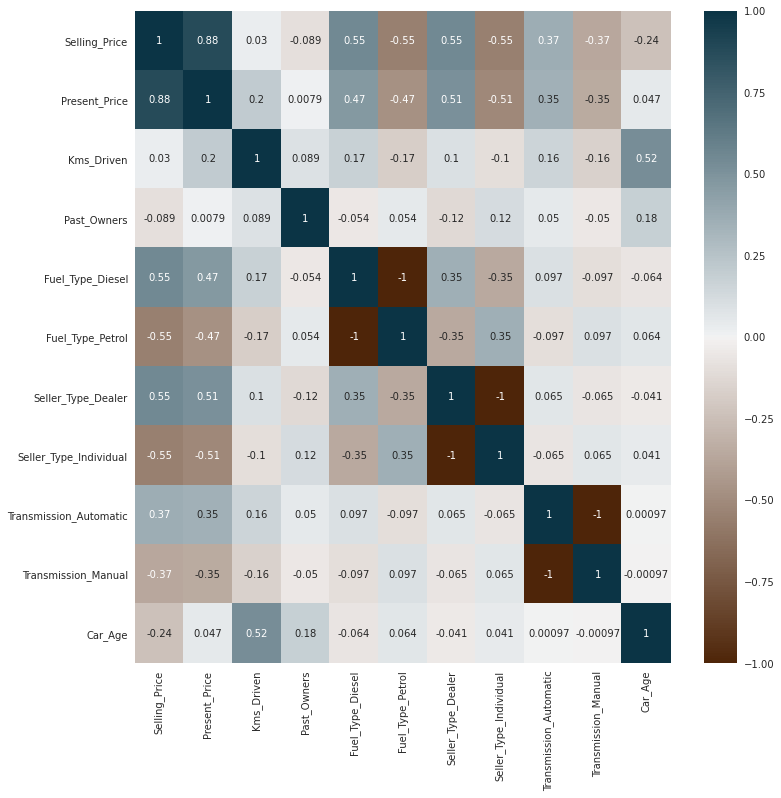

In [14]:
cmap = sns.diverging_palette(30, 230, 90, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True, cmap=cmap)
sns.set(font_scale=1)

In [15]:
corr_matrix = df.corr()
corralations = corr_matrix['Selling_Price'].sort_values(ascending = False) 
high_corr = (corralations > 0.2)|(corralations < -0.2)
pd.DataFrame(corralations[high_corr])
corralations[high_corr].index

Index(['Selling_Price', 'Present_Price', 'Seller_Type_Dealer',
       'Fuel_Type_Diesel', 'Transmission_Automatic', 'Car_Age',
       'Transmission_Manual', 'Fuel_Type_Petrol', 'Seller_Type_Individual'],
      dtype='object')

heatmap of the high correlations with Selling Price:


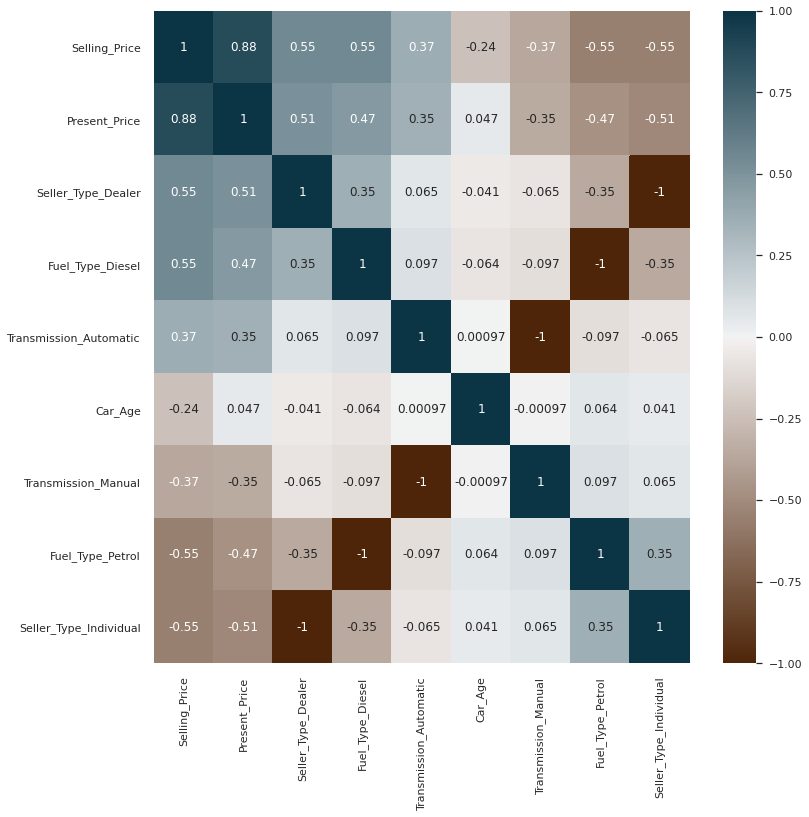

In [16]:
print("heatmap of the high correlations with Selling Price:")
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df[corralations[high_corr].index].corr(),annot=True, cmap=cmap)
sns.set(font_scale=1)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Past_Owners', ylabel='Selling_Price'>

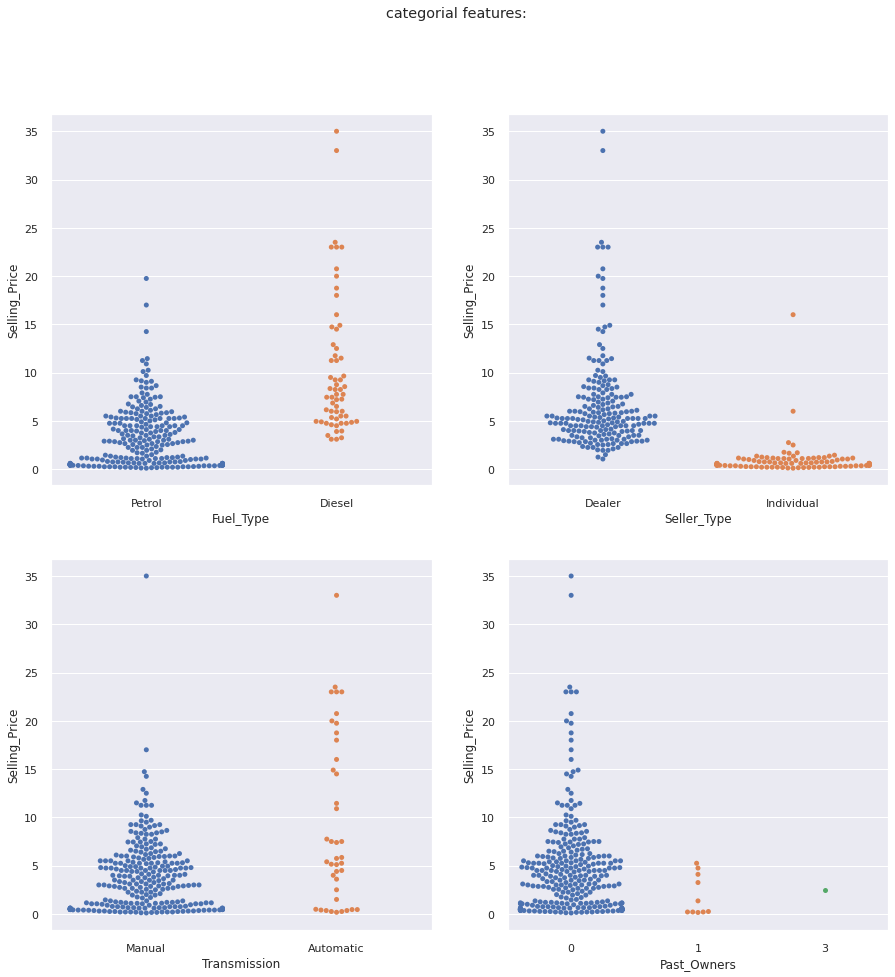

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('categorial features:')

sns.swarmplot(ax=axes[0,0], x="Fuel_Type", y="Selling_Price", data=df_copy)
sns.swarmplot(ax=axes[0,1], x="Seller_Type", y="Selling_Price", data=df_copy)
sns.swarmplot(ax=axes[1,0], x="Transmission", y="Selling_Price", data=df_copy)
sns.swarmplot(ax=axes[1,1], x="Past_Owners", y="Selling_Price", data=df_copy)

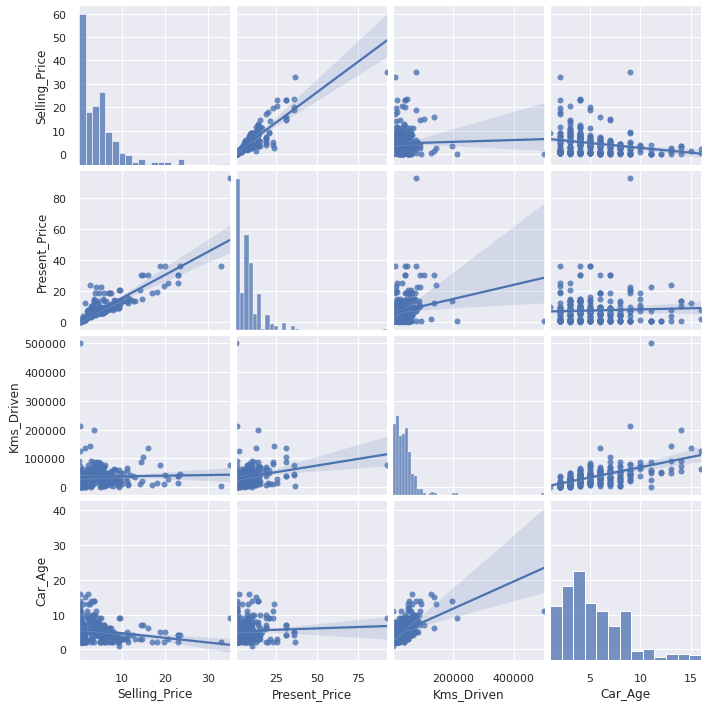

In [18]:
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age']], kind='reg')

This bar plot represents an estimate of central tendency for a Selling-Price with the height of each rectangle and provides some indication of the uncertainty around that estimate price using error bars.


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Selling Price range by Car Age')

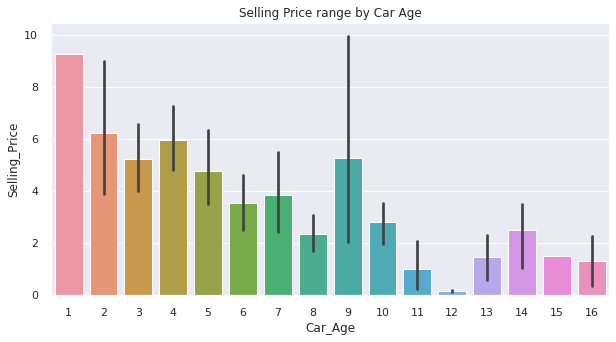

In [19]:
print('This bar plot represents an estimate of central tendency for a Selling-Price with the height of each rectangle and provides some indication of the uncertainty around that estimate price using error bars.')
fig = plt.figure(figsize=(10,5))
sns.barplot('Car_Age','Selling_Price',data=df).set_title('Selling Price range by Car Age')

In [20]:
X = df.drop(columns=['Selling_Price'])
Y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

In [21]:
scaler_standard = StandardScaler()
scaler_MinMax = MinMaxScaler()

X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

numerical_features = ['Present_Price', 'Kms_Driven', 'Past_Owners', 'Car_Age']

# Standardization:
scaler_standard.fit(X_train[numerical_features])
X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])

# Normalization:
scaler_MinMax.fit(X_train[numerical_features])
X_train_normalized[numerical_features] = scaler_MinMax.transform(X_train_normalized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_normalized[numerical_features] = scaler_MinMax.transform(X_test_normalized[numerical_features])
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,Present_Price,Kms_Driven,Past_Owners,Car_Age
mean,7.930164e-18,-5.749369e-17,5.253734e-17,3.965082e-18
std,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00


In [22]:
print('note: the min is 0 and max is 1')
indexes = [False, False, False, True, False, False, False, True]
X_train_normalized.describe()[numerical_features].iloc[indexes]

note: the min is 0 and max is 1


,Present_Price,Kms_Driven,Past_Owners,Car_Age
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0


In [23]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
R2_score = dummy_regr.score(X_test, y_test)
y_predict = dummy_regr.predict(X_test)
mae = MAE(y_test, y_predict)
print('The dummy model have a R2 score of ' + str(R2_score)[:6] + " as expected (around 0), and mean absolute error of " + str(mae)[:4])

The dummy model have a R2 score of -0.003 as expected (around 0), and mean absolute error of 3.70


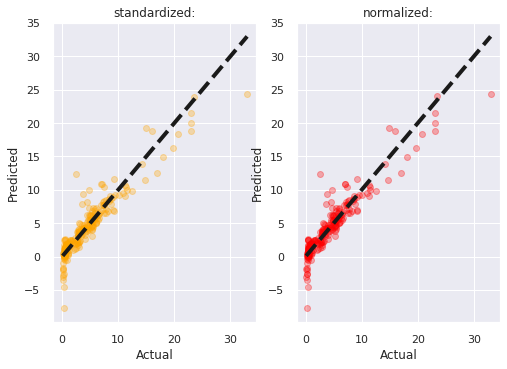

In [24]:
LR = LinearRegression()
kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(LR, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

R2_scores_normalized = cross_val_score(LR, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(LR, X_train_normalized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='orange')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(LR, X_train_normalized, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='red')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

In [25]:
print("the scores of cross validation are:")
print(R2_scores_standardized)
print()
print("mean R2 is: " + str(R2_scores_standardized.mean())[:5] + " with std of  " + str(R2_scores_standardized.std())[:5] + " and MAE of " + str(mae_standarsized)[:6])

the scores of cross validation are:
[0.9238542  0.91135592 0.88288836 0.90675351 0.69332822 0.65915647
 0.8269947  0.83843742 0.87613601 0.89128414]

mean R2 is: 0.841 with std of  0.087 and MAE of 1.1581


In [26]:
print("the scores of cross validation are:")
print(R2_scores_normalized)
print()
print("mean R2 is: " + str(R2_scores_normalized.mean())[:5] + " with std of  " + str(R2_scores_normalized.std())[:5] + " and MAE of " + str(mae_normalized)[:6])

the scores of cross validation are:
[0.92530239 0.91135592 0.88288836 0.90675351 0.69332822 0.65915647
 0.8269947  0.83843742 0.87613601 0.89128414]

mean R2 is: 0.841 with std of  0.087 and MAE of 1.1579


In [27]:
X_train_normalized

,Present_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
227,0.114453,0.265882,0.0,0,1,1,0,0,1,0.428571
80,0.405737,0.105882,0.0,1,0,1,0,0,1,0.071429
68,0.373712,0.411765,0.0,0,1,1,0,0,1,0.428571
298,0.297410,0.411454,0.0,0,1,1,0,0,1,0.571429
194,0.013005,0.232941,0.0,0,1,0,1,0,1,0.642857
...,...,...,...,...,...,...,...,...,...,...
190,0.011974,0.280000,0.0,0,1,0,1,0,1,0.642857
73,0.150097,0.200000,0.0,0,1,1,0,0,1,0.428571
108,0.032860,0.082353,0.0,0,1,0,1,0,1,0.071429
272,0.269563,0.127529,0.0,0,1,1,0,0,1,0.142857


In [28]:
X_train_standardized

,Present_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
227,-0.403933,0.834631,-0.169419,0,1,1,0,0,1,0.955228
80,1.115789,-0.403718,-0.169419,1,0,1,0,0,1,-0.784374
68,0.948707,1.963713,-0.169419,0,1,1,0,0,1,0.955228
298,0.550615,1.961309,-0.169419,0,1,1,0,0,1,1.651069
194,-0.933221,0.579676,-0.169419,0,1,0,1,0,1,1.998990
...,...,...,...,...,...,...,...,...,...,...
190,-0.938596,0.943897,-0.169419,0,1,0,1,0,1,1.998990
73,-0.217963,0.324722,-0.169419,0,1,1,0,0,1,0.955228
108,-0.829630,-0.585828,-0.169419,0,1,0,1,0,1,-0.784374
272,0.405326,-0.236177,-0.169419,0,1,1,0,0,1,-0.436454


In [29]:

df['KMs_Per_year'] = df['Kms_Driven']/df['Car_Age']
df['Present_Price_Age_ratio'] = df['Present_Price']/df['Car_Age']
df['Present_Price_KMs_ratio'] = df['Present_Price']/df['Kms_Driven']
df.describe()[['KMs_Per_year', 'Present_Price_Age_ratio', 'Present_Price_KMs_ratio']]

,KMs_Per_year,Present_Price_Age_ratio,Present_Price_KMs_ratio
count,299.000000,299.000000,299.000000
mean,6759.328845,1.806317,0.000356
std,4575.118147,2.251820,0.000591
min,166.666667,0.040714,0.000001
25%,3775.000000,0.315000,0.000086
50%,6428.571429,1.316667,0.000194
75%,9000.000000,2.427333,0.000353
max,45454.545455,18.115000,0.006038


In [30]:
corr_matrix = df.corr()
corr_matrix['Selling_Price'].sort_values(ascending=False)

Selling_Price              1.000000
Present_Price_Age_ratio    0.934919
Present_Price              0.879131
Seller_Type_Dealer         0.553425
Fuel_Type_Diesel           0.551948
Present_Price_KMs_ratio    0.548595
Transmission_Automatic     0.366627
KMs_Per_year               0.262328
Kms_Driven                 0.029546
Past_Owners               -0.088741
Car_Age                   -0.236047
Transmission_Manual       -0.366627
Fuel_Type_Petrol          -0.551948
Seller_Type_Individual    -0.553425
Name: Selling_Price, dtype: float64

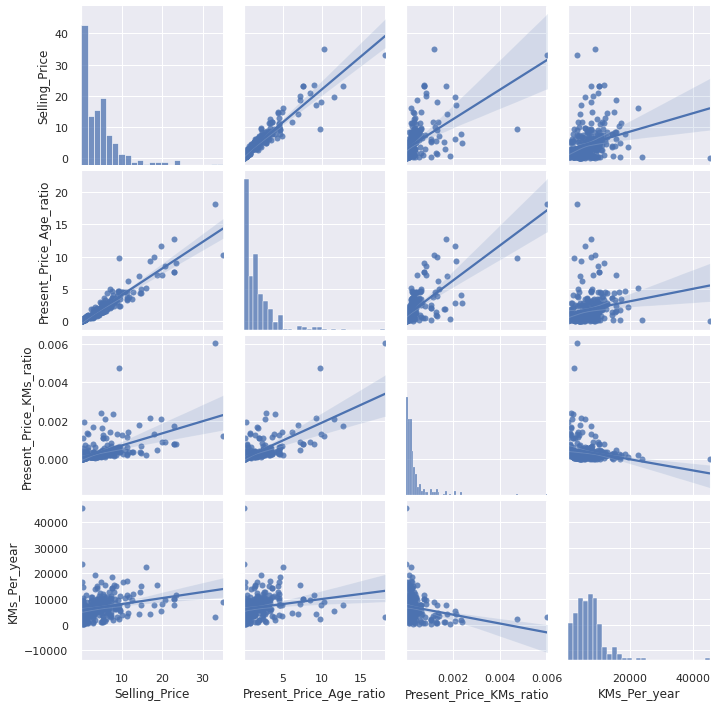

In [31]:
sns.pairplot(df[['Selling_Price', 'Present_Price_Age_ratio', 'Present_Price_KMs_ratio', 'KMs_Per_year']], kind='reg')

In [32]:

X = df.drop(columns=['Selling_Price'])
Y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

# scaling the numerical features
scaler_standard = StandardScaler()
scaler_MinMax = MinMaxScaler()

X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

numerical_features = ['Present_Price', 'Kms_Driven', 'Past_Owners', 'Car_Age', 'KMs_Per_year', 'Present_Price_Age_ratio', 'Present_Price_KMs_ratio']

# Standardization:
scaler_standard.fit(X_train[numerical_features])
X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])

# Normalization:
scaler_MinMax.fit(X_train[numerical_features])
X_train_normalized[numerical_features] = scaler_MinMax.transform(X_train_normalized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_normalized[numerical_features] = scaler_MinMax.transform(X_test_normalized[numerical_features])
kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_standardized = cross_val_score(LR, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

print('standartize:')
print('R2 score: ' + str(R2_standardized.mean())[:6])
print('R2 std: ' + str(R2_standardized.std())[:6])
print('MAE: ' + str(mae_standarsized)[:6])

print()

R2_normalized = cross_val_score(LR, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)

print('normalize: ')
print('R2 score: ' + str(R2_normalized.mean())[:6])
print('R2 std: ' + str(R2_normalized.std())[:6])
print('MAE: ' + str(mae_normalized)[:6])

standartize:
R2 score: 0.9436
R2 std: 0.0204
MAE: 0.7137

normalize: 
R2 score: 0.9436
R2 std: 0.0203
MAE: 0.7137


In [33]:
def copy_by_corr_limit(X, lim, limits):
    X_copy = X.copy()
    s = (limits < lim)
    X_copy = X_copy[X_copy.columns[~s]]
    return X_copy
print('I will use the next list to select features by correlations')
print('correlations (without the sign+-):')
correlations = abs(corr_matrix['Selling_Price']).sort_values(ascending=False)
correlations.drop('Selling_Price', inplace=True)
correlations

I will use the next list to select features by correlations
correlations (without the sign+-):


Present_Price_Age_ratio    0.934919
Present_Price              0.879131
Seller_Type_Individual     0.553425
Seller_Type_Dealer         0.553425
Fuel_Type_Diesel           0.551948
Fuel_Type_Petrol           0.551948
Present_Price_KMs_ratio    0.548595
Transmission_Automatic     0.366627
Transmission_Manual        0.366627
KMs_Per_year               0.262328
Car_Age                    0.236047
Past_Owners                0.088741
Kms_Driven                 0.029546
Name: Selling_Price, dtype: float64

In [34]:
corr_limits = [0, 0.03, 0.09, 0.25, 0.35, 0.40, 0.55, 0.552, 0.555, 0.9]

mean_scores = []
std_scores = []
mae_scores = []

for limit in corr_limits:
    X_train_copy = copy_by_corr_limit(X_train_standardized, limit, correlations)
    R2_scores = cross_val_score(LR, X_train_copy, y_train, cv=kf)
    y_predict = cross_val_predict(LR, X_train_copy, y_train, cv=kf)
    mae_score = MAE(y_train, y_predict)

    
    mean_scores.append(R2_scores.mean())
    std_scores.append(R2_scores.std())
    mae_scores.append(mae_score)
    
pd.DataFrame(data={'lim correlation:':corr_limits, 'R2_score': mean_scores, 'R2_std': std_scores, 'MAE score': mae_scores}) 

,lim correlation:,R2_score,R2_std,MAE score
0,0.000,0.943682,0.020420,0.713764
1,0.030,0.943740,0.020252,0.713953
2,0.090,0.834060,0.112351,1.129761
3,0.250,0.841019,0.087597,1.158149
4,0.350,0.820258,0.117508,1.217651
5,0.400,0.814790,0.127190,1.219169
6,0.550,0.814790,0.127190,1.219169
7,0.552,0.817433,0.121175,1.215311
8,0.555,0.791201,0.130446,1.239433
9,0.900,0.758783,0.139454,1.271603


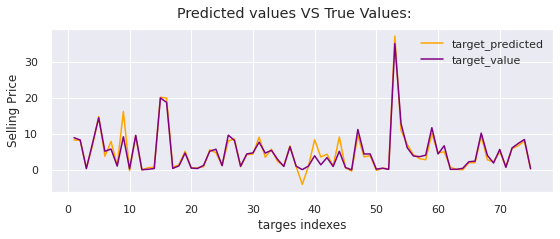

,R2_score,MAE score
test LR model,0.936109,0.814803


In [35]:
X_train_copy = copy_by_corr_limit(X_train_standardized, 0.00, correlations)
X_test_copy = copy_by_corr_limit(X_test_standardized, 0.00, correlations)

LR.fit(X_train_copy, y_train)
R2_score = LR.score(X_test_copy, y_test)
y_predict = LR.predict(X_test_copy)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test LR model'], data={'R2_score': R2_score, 'MAE score': mae_score})

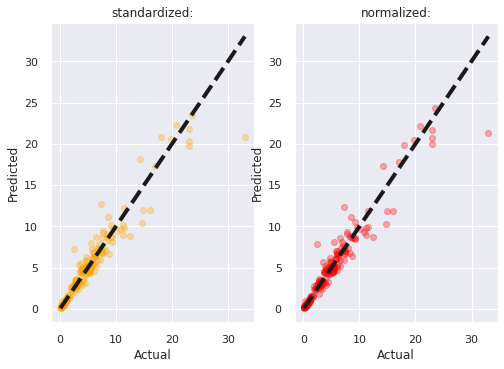

In [36]:
RFR = RandomForestRegressor()
kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(RFR, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

R2_scores_normalized = cross_val_score(RFR, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(RFR, X_train_normalized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(RFR, X_train_standardized, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='orange')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(RFR, X_train_normalized, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='red')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

In [37]:
print("the scores of cross validation are:")
print(R2_scores_standardized)
print()
print("mean R2 is: " + str(R2_scores_standardized.mean())[:5] + " with std of  " + str(R2_scores_standardized.std())[:5] + " and MAE of " + str(mae_standarsized)[:6])

the scores of cross validation are:
[0.98380694 0.94329962 0.95601845 0.95521309 0.95170098 0.8500546
 0.87604974 0.85422109 0.98068848 0.95312683]

mean R2 is: 0.930 with std of  0.047 and MAE of 0.6387


In [38]:
print("the scores of cross validation are:")
print(R2_scores_normalized)
print()
print("mean R2 is: " + str(R2_scores_normalized.mean())[:5] + " with std of  " + str(R2_scores_normalized.std())[:5] + " and MAE of " + str(mae_normalized)[:6])

the scores of cross validation are:
[0.98207591 0.9463436  0.9655325  0.95501882 0.95066256 0.86764409
 0.87709798 0.85053828 0.9816444  0.95249333]

mean R2 is: 0.932 with std of  0.046 and MAE of 0.6459


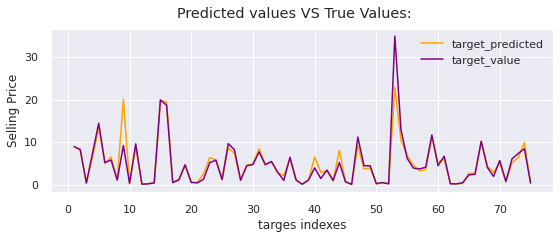

,R2_score,MAE score
test LR model,0.864749,0.802845


In [39]:
RFR = RandomForestRegressor()

RFR.fit(X_train_normalized, y_train)
R2_score = RFR.score(X_test_normalized, y_test)
y_predict = RFR.predict(X_test_normalized)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test LR model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 

In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = kf, verbose=2, random_state=42, n_jobs = -1, scoring='r2')
# Fit the random search model
rf_random.fit(X_train_normalized, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=2)